In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("Dataset.csv")
data = data.drop('Name', axis = 1)

x = data.drop('Emotion', axis = 1)
y = data['Emotion']

In [3]:
from sklearn.model_selection import train_test_split
#svm_train, svm_test = train_test_split(data, test_size=0.2)
dataTrain, dataTest, classTrain, classTest = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [4]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import preprocessing
import numpy as np

svc_li = SVC(kernel='linear')

scaler = preprocessing.StandardScaler()
scaler.fit(dataTrain)

Z_svm_train = scaler.transform(dataTrain)
Z_svm_test = scaler.transform(dataTest)

svc_li.fit(Z_svm_train, np.asarray(classTrain))

predTrain = svc_li.predict(Z_svm_train)
predTest = svc_li.predict(Z_svm_test)

print('Linear Kernel')
print(classification_report(classTest, svc_li.predict(Z_svm_test)))

Linear Kernel
              precision    recall  f1-score   support

       ANGRY       0.66      0.61      0.63        38
        CALM       0.59      0.67      0.62        36
     DISGUST       0.30      0.31      0.31        42
     FEARFUL       0.48      0.57      0.52        40
       HAPPY       0.44      0.35      0.39        40
     NEUTRAL       0.36      0.16      0.22        25
         SAD       0.33      0.50      0.39        26
   SURPRISED       0.53      0.49      0.51        41

    accuracy                           0.47       288
   macro avg       0.46      0.46      0.45       288
weighted avg       0.47      0.47      0.46       288



In [5]:
from sklearn.metrics import accuracy_score

print("Training Accuracy: ", accuracy_score(classTrain, predTrain))
print("Testing Accuracy: ", accuracy_score(classTest, predTest))

Training Accuracy:  0.7491319444444444
Testing Accuracy:  0.4652777777777778


Confusion Matrix for Training Set for Linear Kernel:


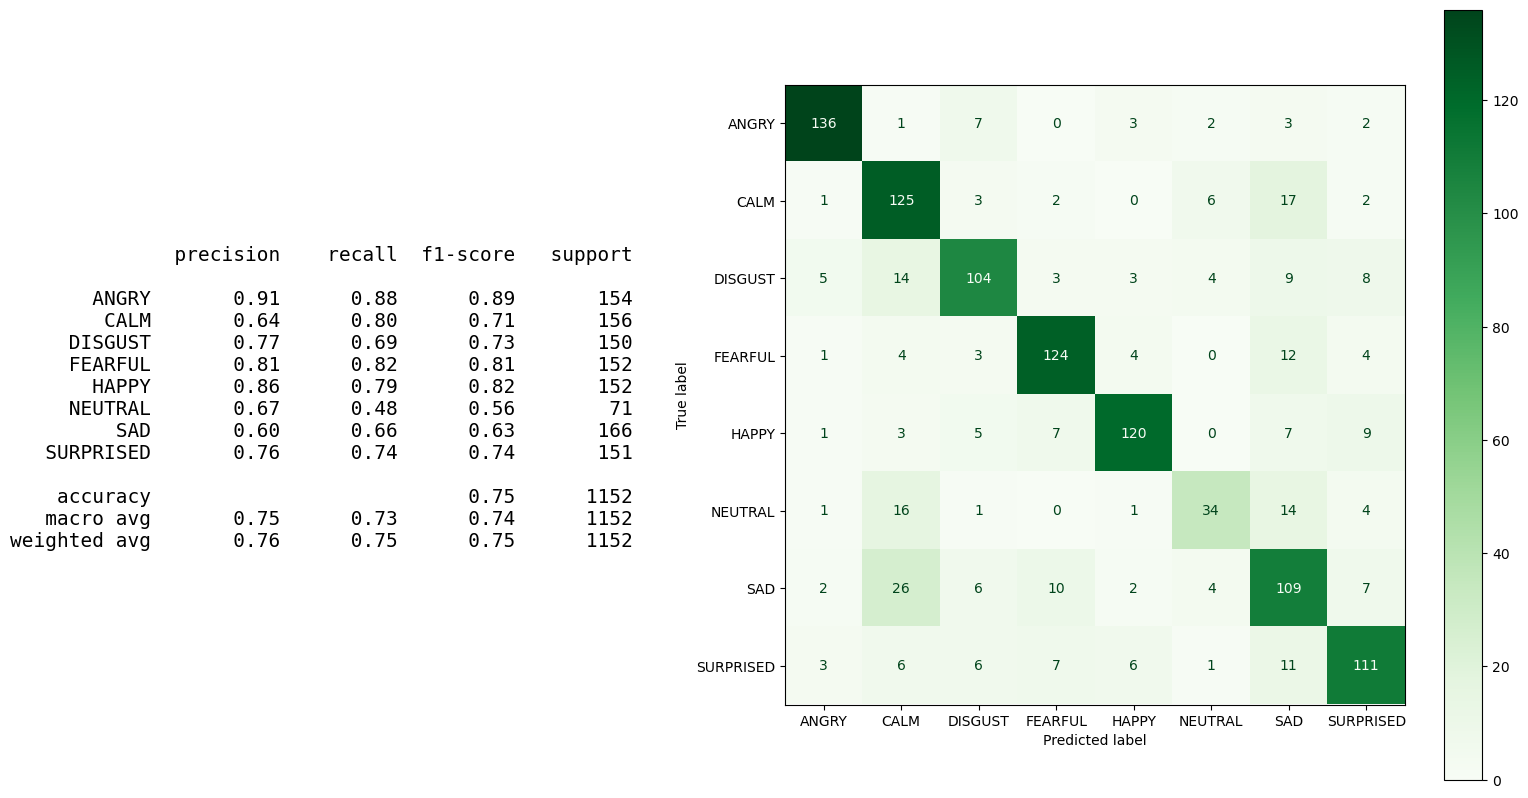

In [6]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

print("Confusion Matrix for Training Set for Linear Kernel:")

disp = ConfusionMatrixDisplay.from_predictions(classTrain, predTrain, display_labels = svc_li.classes_, cmap = plt.cm.Greens)
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)
mono = {'family' : 'monospace'}
cr = classification_report(classTrain, predTrain, zero_division = 0, target_names = svc_li.classes_)
plt.text(-10.5, 5.75, cr, fontdict = mono, fontsize = 14)
plt.show()

Confusion Matrix for Test Set for Linear Kernel:


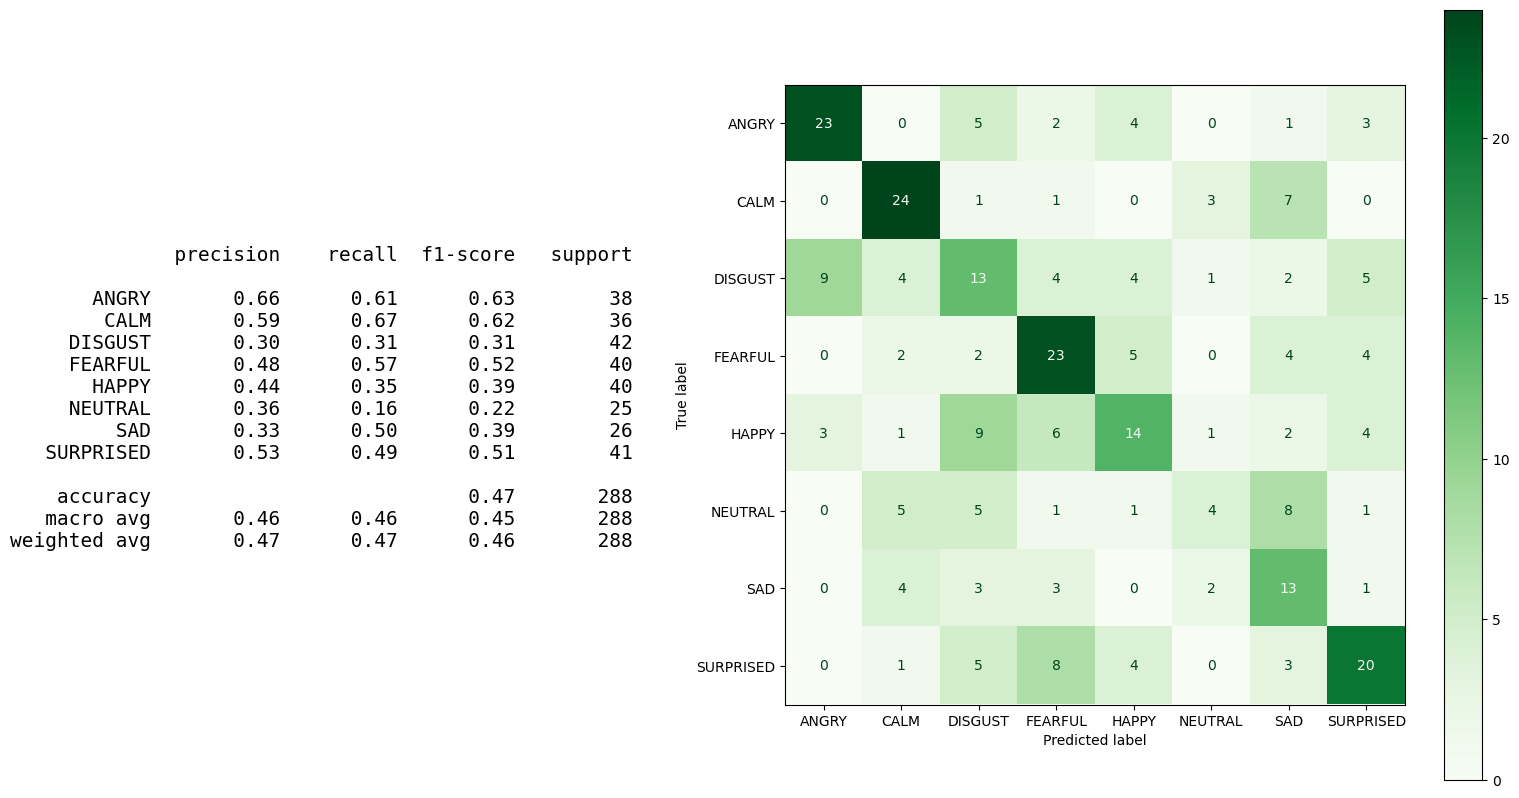

In [7]:
print("Confusion Matrix for Test Set for Linear Kernel:")

disp = ConfusionMatrixDisplay.from_predictions(classTest, predTest, display_labels = svc_li.classes_, cmap = plt.cm.Greens)
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)
mono = {'family' : 'monospace'}
cr = classification_report(classTest, predTest, zero_division = 0, target_names = svc_li.classes_)
plt.text(-10.5, 5.75, cr, fontdict = mono, fontsize = 14)
plt.show()

# RBF Kernel

In [8]:
svc_rbf = SVC(kernel='rbf')

scaler = preprocessing.StandardScaler()
scaler.fit(dataTrain)

Z_train = scaler.transform(dataTrain)
Z_test = scaler.transform(dataTest)

svc_rbf.fit(Z_train, np.asarray(classTrain))

predTrain = svc_rbf.predict(Z_svm_train)
predTest = svc_rbf.predict(Z_svm_test)

print('RBF Kernel')
print(classification_report(classTest, svc_rbf.predict(Z_svm_test),zero_division = 0))

RBF Kernel
              precision    recall  f1-score   support

       ANGRY       0.61      0.37      0.46        38
        CALM       0.47      0.78      0.58        36
     DISGUST       0.32      0.38      0.35        42
     FEARFUL       0.71      0.50      0.59        40
       HAPPY       0.40      0.30      0.34        40
     NEUTRAL       0.00      0.00      0.00        25
         SAD       0.28      0.46      0.35        26
   SURPRISED       0.41      0.54      0.46        41

    accuracy                           0.43       288
   macro avg       0.40      0.42      0.39       288
weighted avg       0.42      0.43      0.41       288



In [9]:
from sklearn.metrics import accuracy_score

print("Training Accuracy for RBF kernel: ", accuracy_score(classTrain, predTrain))
print("Testing Accuracy for RBF kernel: ", accuracy_score(classTest, predTest))

Training Accuracy for RBF kernel:  0.5677083333333334
Testing Accuracy for RBF kernel:  0.4305555555555556


Confusion Matrix for Training Set for RBF Kernel:


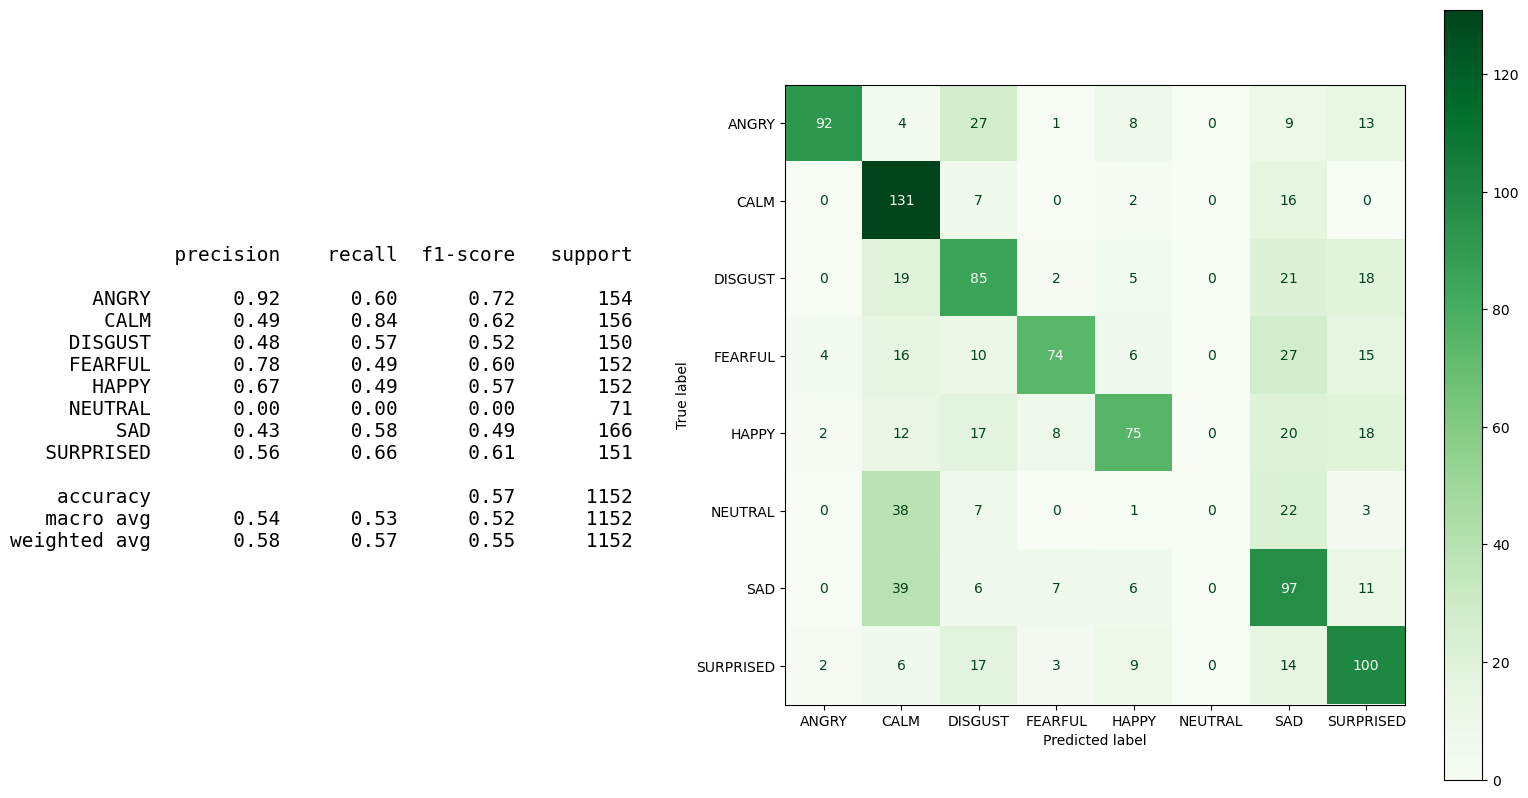

In [10]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

print("Confusion Matrix for Training Set for RBF Kernel:")

disp = ConfusionMatrixDisplay.from_predictions(classTrain, predTrain, display_labels = svc_rbf.classes_, cmap = plt.cm.Greens)
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)
mono = {'family' : 'monospace'}
cr = classification_report(classTrain, predTrain, zero_division = 0, target_names = svc_rbf.classes_)
plt.text(-10.5, 5.75, cr, fontdict = mono, fontsize = 14)
plt.show()

Confusion Matrix for Test Set for RBF Kernel:


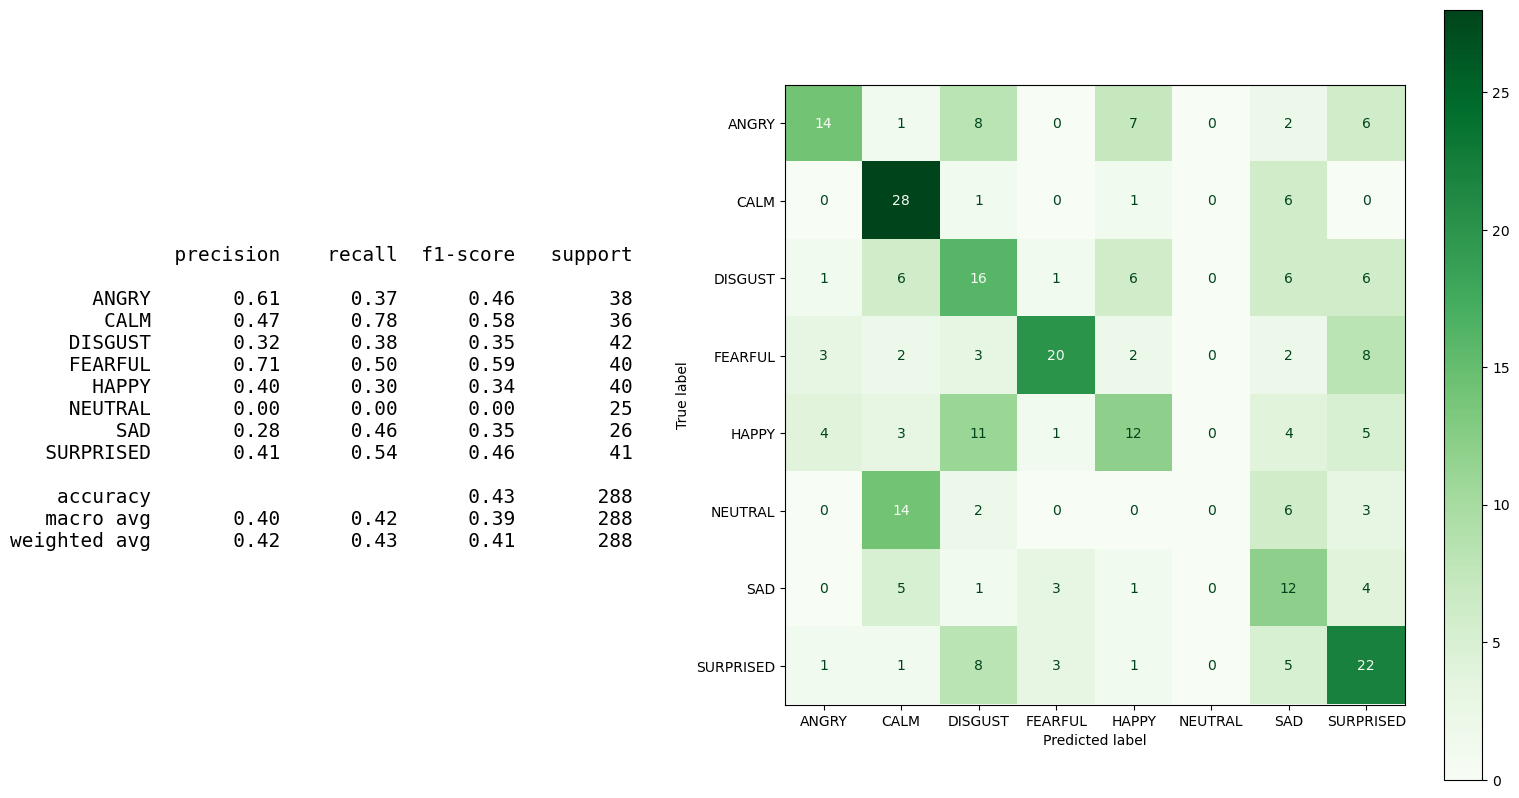

In [11]:
print("Confusion Matrix for Test Set for RBF Kernel:")

disp = ConfusionMatrixDisplay.from_predictions(classTest, predTest, display_labels = svc_li.classes_, cmap = plt.cm.Greens)
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)
mono = {'family' : 'monospace'}
cr = classification_report(classTest, predTest, zero_division = 0, target_names = svc_li.classes_)
plt.text(-10.5, 5.75, cr, fontdict = mono, fontsize = 14)
plt.show()